# Logistics

* If you feel lost while working on this notebook (in class or outside or class), don't hesitate to post questions here: https://piazza.com/class/jrzeap5kpirw

# Description of the dataset

The file "Bertrand-physiodata.csv" was captured using the Empatica E4 wristband when Bertrand was teaching a class last Fall. The E4 collects information about a person's heart rate, electrodermal actibity, movements and temperature:

![title](https://support.empatica.com/hc/article_attachments/360000797783/e4_specs.jpg)

the csv file contains the following columns:
* **tags**: users can tag events by pressing a button on the wristband
* **real time**: time of the data collection
* **unix time**: number of seconds since 00:00:00 Thursday, 1 January 1970
* **BVP**: Blood volume pressure (used to compute HR data)
* **HR**: Heart rate data
* **EDA**: Electrodermal activity (i.e., physiological arousal)
* **TEMP**: temperature of the skin
* **ACC_x**: accelerometer data on the x axis
* **ACC_y**: accelerometer data on the y axis
* **ACC_z**: accelerometer data on the z axis

Today we are going to explore Bertrand's physiological response to teaching! :) more specifically, we are going to explore the relationship between heart rate and electrodermal activity. 

# Panda Review

Concepts: 
* head, tail, info, values
* zip, dict, pd.DataFrame
* df.columns
* read_csv, delimiter, header, index



In [ ]:
# 1) import the pandas library as pd
import pandas as pd

In [ ]:
# 2) import the csv file into a variable called df
df=pd.read_csv('./Bertrand-physiodata.csv', parse_dates=True, index_col="real time")

In [ ]:
# 3) print the column names, just to make 
# sure that it matches what we have above
df.columns
print('hello')

In [ ]:
# 4) use the head() function to check your data
df.head()

In [ ]:
# 5) use the tail() function on your dataframe. How many rows do you have?
df.tail()

In [ ]:
# 6) use the info() function to inspect your data:
df.info()

In [ ]:
# 7) knowing that BVP is collected 64 times per second (i.e., 64Hz),
# what can you tell of the sampling frequency of the other measures?

# Most of the other measures have similar sampling frequency, such as tags, real time, unix time
# The sampling frequency of HR is onece per second
# The sampling frequency of ACC_x ACC_y ACC_z is approximately 32 times per second

# Plotting

Concepts: 
* plot, subplot, line plots, scatter, box plots, hist, ...
* mean, median, quantiles, STD, etc. 
* separate and summarize

In [ ]:
# 8) make sure you're plotting your graphs inline
# Hint: https://stackoverflow.com/questions/19410042/how-to-make-ipython-notebook-matplotlib-plot-inline
import matplotlib.pyplot as plt
%matplotlib inline

### Let's work on the heart rate (HR) data first

In this section we are going to produce various graphs to inspect Bertrand's heart rate data. 

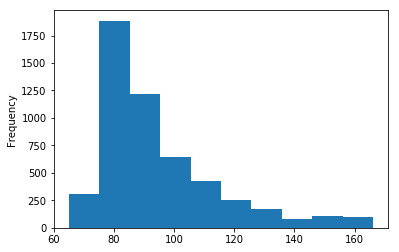

In [21]:
# 9) produce a histogram of the heart rate data; what can you say from it?

df['HR'].plot(kind='hist')
plt.show()
# The histogram is right-skewed. People's heart rate is mostly 80, followed by 90, and so on.

[]

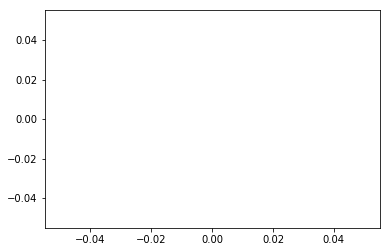

In [22]:
# 10) Try to plot the values over time (e.g., use the real time for the x axis):
plt.plot(x=df['real time'], y=df['HR'])

11) What happened? Come up with 2-3 reasons why this didn't work before you move on to the next question:
- reason 1: real time is Series of string
- reason 2: the type of real time is object
- reason 3: There are missing values

After you've anwered the question above, feel free to look at this hint and try to fix your dataframe: https://stackoverflow.com/questions/22551403/python-pandas-filtering-out-nan-from-a-data-selection-of-a-column-of-strings/22553757

In [23]:
# 12) Fix your dataframe using the link above: 
df[df.HR.notnull()]


,tags,real time,unix time,BVP,HR,EDA,TEMP,ACC_x,ACC_y,ACC_z
640,0.0,9/11/18 08:28,1.536669e+09,-79.05,72.00,1.059777,33.31,-13.0,65.0,-24.0
704,0.0,9/11/18 08:28,1.536669e+09,218.11,71.50,1.125105,33.31,-35.0,-7.0,34.0
768,0.0,9/11/18 08:28,1.536669e+09,-20.02,65.00,1.501703,33.31,-40.0,-12.0,34.0
832,0.0,9/11/18 08:28,1.536669e+09,76.70,92.25,1.204524,33.31,-31.0,13.0,46.0
896,0.0,9/11/18 08:28,1.536669e+09,71.85,87.60,1.184028,33.31,-38.0,8.0,51.0
960,0.0,9/11/18 08:28,1.536669e+09,9.11,102.00,1.171219,33.31,-39.0,8.0,49.0
1024,0.0,9/11/18 08:28,1.536669e+09,-12.12,112.29,1.164814,33.34,-36.0,5.0,50.0
1088,0.0,9/11/18 08:28,1.536669e+09,4.94,121.25,1.154567,33.34,-38.0,8.0,50.0
1152,0.0,9/11/18 08:28,1.536669e+09,-3.46,130.00,1.136634,33.39,-38.0,9.0,50.0
1217,0.0,9/11/18 08:28,1.536669e+09,-11.60,136.60,1.116138,33.43,-37.0,7.0,50.0


### Now let's look at the electrodermal activity data (EDA)

In this section we are going to produce various graphs to inspect Bertrand's electrodermal data. 

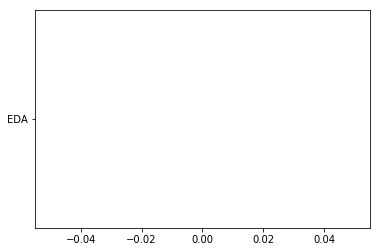

In [24]:
# 13) produce a line plot to visually inspect the EDA data
# Hint: make sure you filter the nonnull data
plt.plot('EDA')

Feel free to look at the following page to make sense of the units of the EDA data: 
* https://support.empatica.com/hc/en-us/articles/203621955-What-should-I-know-to-use-EDA-data-in-my-experiment-

In [11]:
# 14) we don't have any labels on the x axis! 
# convert the 'real time' column into a real date time
# Hint: https://campus.datacamp.com/courses/pandas-foundations/time-series-in-pandas?ex=3


In [12]:
# 15) print the mean and median values of the EDA data; explain how they are different


In [13]:
# 16) plot a histogram of the EDA values; does that confirm your interpretation above?


### Combining EDA and HR data on the same graph

In this section we are going to produce various graphs to inspect both the HR and EDA data.

In [14]:
# 17) filter both the EDA and HR values to keep the non-null rows:


In [15]:
# 18) plot EDA and HR on two different graphs using subplots
# hint: https://stackoverflow.com/questions/31726643/how-do-i-get-multiple-subplots-in-matplotlib


In [16]:
# 19) plot EDA and HR on the same graph; what went wrong?


In [17]:
# 20) normalize the HR and EDA columns using your favorite normalization strategy
# Hint: https://stackoverflow.com/questions/12525722/normalize-data-in-pandas


In [18]:
# 21) plot EDA and HR on the same graph; does the result look better?


In [19]:
# 22) what can you observe from the graph? Does there seem to be an agreement between HR and EDA?


**IN-CLASS DISCUSSION**: why do we normalize values? When do we want to normalize them?

# Time series

Concepts:
* indexing, slicing, datetimeIndex
* resampling, rolling mean
* method chaining and filtering
* plotting time series

In this section, we are going to work with some built-in function of pandas to work with time series. More specifically, we are going to downsample our data and use a rolling window to generate additional graphs.

In [53]:
# let's reimport our data to make sure it's clean
df = pd.read_csv('Bertrand-physiodata.csv')
filtered_df = df[df['EDA'].notnull() & df['EDA'].notnull()].copy()

# make sure that you are converting the real time column into a datetime
filtered_df['real time'] = pd.to_datetime(filtered_df['real time'], format='%d/%m/%y %H:%M')
filtered_df = filtered_df.set_index('real time')

filtered_df.head()

,tags,unix time,BVP,HR,EDA,TEMP,ACC_x,ACC_y,ACC_z
real time,,,,,,,,,
2018-11-09 08:28:00,0.0,1.536669e+09,0.00,NaN,0.000000,33.31,-50.0,7.0,28.0
2018-11-09 08:28:00,0.0,1.536669e+09,-0.05,NaN,0.836457,33.31,-32.0,64.0,27.0
2018-11-09 08:28:00,0.0,1.536669e+09,6.20,NaN,1.183860,33.31,-14.0,57.0,50.0
2018-11-09 08:28:00,0.0,1.536669e+09,22.90,NaN,1.167277,33.31,-22.0,52.0,24.0
2018-11-09 08:28:00,0.0,1.536669e+09,93.76,NaN,1.278719,33.31,-17.0,53.0,27.0


### Down sampling

In [20]:
# 23) Use the instruction from datacamp to resample your data in 60 seconds windows and plot the result
# Hint: https://campus.datacamp.com/courses/pandas-foundations/time-series-in-pandas?ex=7


In [21]:
# 24) do the same thing, but this time using the rolling() function in a 60sec window


In [ ]:
# 25) What is the difference between rolling() and resample()? Why do the graphs look different?

## Correlations

In this section we're going to keep exploring the relationship between heart rate data and electrodermal activity. We are going to do this visually (with a scatter plot first) and then using a statistical test (Pearson's correlation). 

In [22]:
# 26) create a scatter plot between HR and EDA:


In [23]:
# 27) compute pearson's correlation between the HR and EDA data
.corr(method='pearson')

In [24]:
# 29) what can you conclude? Is there a linear relationship between HR and EDA data in this dataset?
